In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Define file paths (modify if needed based on your Colab file paths)
travel_details_path = "/content/drive/My Drive/Colab Files/travel_details_dataset.csv"
mountains_vs_beaches_path = "/content/drive/My Drive/Colab Files/mountains_vs_beaches_preferences.csv"
global_hotels_path = "/content/drive/My Drive/Colab Files/global-hotels.csv"

# Load datasets into DataFrames
travel_df = pd.read_csv(travel_details_path)
mountains_df = pd.read_csv(mountains_vs_beaches_path)
hotels_df = pd.read_csv(global_hotels_path)

# Display the first few rows of each dataset
print("Travel Details Dataset:")
display(travel_df.head())

print("\nMountains vs Beaches Preferences Dataset:")
display(mountains_df.head())

print("\nGlobal Hotels Dataset:")
display(hotels_df.head())


Travel Details Dataset:


,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
0,1,"London, UK",5/1/2023,5/8/2023,7.0,John Smith,35.0,Male,American,Hotel,1200,Flight,600
1,2,"Phuket, Thailand",6/15/2023,6/20/2023,5.0,Jane Doe,28.0,Female,Canadian,Resort,800,Flight,500
2,3,"Bali, Indonesia",7/1/2023,7/8/2023,7.0,David Lee,45.0,Male,Korean,Villa,1000,Flight,700
3,4,"New York, USA",8/15/2023,8/29/2023,14.0,Sarah Johnson,29.0,Female,British,Hotel,2000,Flight,1000
4,5,"Tokyo, Japan",9/10/2023,9/17/2023,7.0,Kim Nguyen,26.0,Female,Vietnamese,Airbnb,700,Train,200



Mountains vs Beaches Preferences Dataset:


,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56,male,71477,bachelor,9,skiing,2477,urban,175,267,summer,0,1,1
1,69,male,88740,master,1,swimming,4777,suburban,228,190,fall,0,1,0
2,46,female,46562,master,0,skiing,1469,urban,71,280,winter,0,0,1
3,32,non-binary,99044,high school,6,hiking,1482,rural,31,255,summer,1,0,1
4,60,female,106583,high school,5,sunbathing,516,suburban,23,151,winter,1,1,0



Global Hotels Dataset:


,Hotel_Name,Rating,Score,Number_Reviews,Price,Room_Type,City,Country
0,Adina Apartment Hotel Melbourne Flinders Street,Excellent,8.8,"2,334",183,Premier One-Bedroom Apartment,Melbourne,Australia
1,Adina Apartment Hotel Melbourne Southbank,Excellent,8.7,"6,368",133,Studio Apartment - King,Melbourne,Australia
2,Atlantis Hotel Melbourne,Very Good,8.3,"10,290",86,Executive Queen Suite,Melbourne,Australia
3,Avani Melbourne Jazz Corner Residences,Very Good,8.5,"1,339",114,Studio,Melbourne,Australia
4,Brady Apartment Hotel Flinders Street,Very Good,8.4,"2,938",98,Studio Apartment,Melbourne,Australia


In [4]:
# Rename 'Traveler age' to 'Age' for consistency
travel_df.rename(columns={"Traveler age": "Age"}, inplace=True)

# Display the first few rows to verify the change
print("Updated Travel Details Dataset:")
display(travel_df.head())

Updated Travel Details Dataset:


,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
0,1,"London, UK",5/1/2023,5/8/2023,7.0,John Smith,35.0,Male,American,Hotel,1200,Flight,600
1,2,"Phuket, Thailand",6/15/2023,6/20/2023,5.0,Jane Doe,28.0,Female,Canadian,Resort,800,Flight,500
2,3,"Bali, Indonesia",7/1/2023,7/8/2023,7.0,David Lee,45.0,Male,Korean,Villa,1000,Flight,700
3,4,"New York, USA",8/15/2023,8/29/2023,14.0,Sarah Johnson,29.0,Female,British,Hotel,2000,Flight,1000
4,5,"Tokyo, Japan",9/10/2023,9/17/2023,7.0,Kim Nguyen,26.0,Female,Vietnamese,Airbnb,700,Train,200


In [5]:
# Merge travel details with mountains_vs_beaches_preferences based on Age
merged_df = pd.merge(travel_df, mountains_df, on="Age", how="inner")

# Display the first few rows to verify the merge
print("Merged Dataset:")
display(merged_df.head())

Merged Dataset:


,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Age,Traveler gender,Traveler nationality,Accommodation type,...,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,1,"London, UK",5/1/2023,5/8/2023,7.0,John Smith,35.0,Male,American,Hotel,...,7,hiking,1641,suburban,123,184,winter,0,1,1
1,1,"London, UK",5/1/2023,5/8/2023,7.0,John Smith,35.0,Male,American,Hotel,...,5,skiing,826,urban,26,66,fall,0,0,1
2,1,"London, UK",5/1/2023,5/8/2023,7.0,John Smith,35.0,Male,American,Hotel,...,9,swimming,780,urban,61,194,winter,0,0,0
3,1,"London, UK",5/1/2023,5/8/2023,7.0,John Smith,35.0,Male,American,Hotel,...,3,hiking,3436,suburban,275,14,summer,0,0,0
4,1,"London, UK",5/1/2023,5/8/2023,7.0,John Smith,35.0,Male,American,Hotel,...,4,skiing,3917,suburban,80,260,summer,1,1,1


In [6]:
# Drop columns that are not useful for model training
columns_to_drop = [
    "Trip ID", "Traveler name", "Start date", "End date",
    "Traveler gender", "Traveler nationality", "Accommodation type", "Transportation type"
]

merged_df.drop(columns=columns_to_drop, inplace=True, errors="ignore")

# Display the updated dataset
print("Cleaned Merged Dataset:")
display(merged_df.head())

Cleaned Merged Dataset:


,Destination,Duration (days),Age,Accommodation cost,Transportation cost,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,"London, UK",7.0,35.0,1200,600,non-binary,98367,bachelor,7,hiking,1641,suburban,123,184,winter,0,1,1
1,"London, UK",7.0,35.0,1200,600,non-binary,116651,doctorate,5,skiing,826,urban,26,66,fall,0,0,1
2,"London, UK",7.0,35.0,1200,600,female,110659,master,9,swimming,780,urban,61,194,winter,0,0,0
3,"London, UK",7.0,35.0,1200,600,female,101676,bachelor,3,hiking,3436,suburban,275,14,summer,0,0,0
4,"London, UK",7.0,35.0,1200,600,male,41585,master,4,skiing,3917,suburban,80,260,summer,1,1,1


In [7]:
# Select relevant features for model training
selected_features = [
    "Destination",  # Target variable
    "Duration (days)",
    "Age",
    "Accommodation cost",
    "Transportation cost",
    "Income",
    "Travel_Frequency",
    "Vacation_Budget",
    "Proximity_to_Mountains",
    "Proximity_to_Beaches",
    "Preference",
]

# Keep only selected columns
filtered_df = merged_df[selected_features]

# Display the cleaned dataset
print("Filtered Dataset for Model Training:")
display(filtered_df.head())

Filtered Dataset for Model Training:


,Destination,Duration (days),Age,Accommodation cost,Transportation cost,Income,Travel_Frequency,Vacation_Budget,Proximity_to_Mountains,Proximity_to_Beaches,Preference
0,"London, UK",7.0,35.0,1200,600,98367,7,1641,123,184,1
1,"London, UK",7.0,35.0,1200,600,116651,5,826,26,66,1
2,"London, UK",7.0,35.0,1200,600,110659,9,780,61,194,0
3,"London, UK",7.0,35.0,1200,600,101676,3,3436,275,14,0
4,"London, UK",7.0,35.0,1200,600,41585,4,3917,80,260,1


In [8]:
from sklearn.preprocessing import LabelEncoder

# Initialize Label Encoder
label_encoder = LabelEncoder()

# Encode 'Destination' into numerical values
filtered_df["Destination"] = label_encoder.fit_transform(filtered_df["Destination"])

# Save the mapping for later use (to decode predictions)
destination_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Display the mapping
print("Destination Encoding Mapping:")
print(destination_mapping)

# Display the dataset after encoding
print("\nDataset After Encoding Destination:")
display(filtered_df.head())


Destination Encoding Mapping:
{'Amsterdam': 0, 'Amsterdam, Netherlands': 1, 'Athens, Greece': 2, 'Auckland, New Zealand': 3, 'Australia': 4, 'Bali': 5, 'Bali, Indonesia': 6, 'Bangkok': 7, 'Bangkok, Thai': 8, 'Bangkok, Thailand': 9, 'Barcelona': 10, 'Barcelona, Spain': 11, 'Berlin, Germany': 12, 'Brazil': 13, 'Canada': 14, 'Cancun, Mexico': 15, 'Cape Town': 16, 'Cape Town, SA': 17, 'Cape Town, South Africa': 18, 'Dubai': 19, 'Dubai, United Arab Emirates': 20, 'Edinburgh, Scotland': 21, 'Egypt': 22, 'France': 23, 'Greece': 24, 'Hawaii': 25, 'Honolulu, Hawaii': 26, 'Italy': 27, 'Japan': 28, 'London': 29, 'London, UK': 30, 'Los Angeles, USA': 31, 'Marrakech, Morocco': 32, 'Mexico': 33, 'New York': 34, 'New York City, USA': 35, 'New York, USA': 36, 'Paris': 37, 'Paris, France': 38, 'Phnom Penh': 39, 'Phuket': 40, 'Phuket, Thai': 41, 'Phuket, Thailand': 42, 'Rio de Janeiro': 43, 'Rio de Janeiro, Brazil': 44, 'Rome': 45, 'Rome, Italy': 46, 'Santorini': 47, 'Seoul': 48, 'Seoul, South Korea': 4

<ipython-input-8-deb4f00e002e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Destination"] = label_encoder.fit_transform(filtered_df["Destination"])


,Destination,Duration (days),Age,Accommodation cost,Transportation cost,Income,Travel_Frequency,Vacation_Budget,Proximity_to_Mountains,Proximity_to_Beaches,Preference
0,30,7.0,35.0,1200,600,98367,7,1641,123,184,1
1,30,7.0,35.0,1200,600,116651,5,826,26,66,1
2,30,7.0,35.0,1200,600,110659,9,780,61,194,0
3,30,7.0,35.0,1200,600,101676,3,3436,275,14,0
4,30,7.0,35.0,1200,600,41585,4,3917,80,260,1


In [9]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = filtered_df.drop(columns=["Destination"])  # Features
y = filtered_df["Destination"]  # Target variable

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the training and testing sets
print(f"Training set: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Testing set: X_test = {X_test.shape}, y_test = {y_test.shape}")


Training set: X_train = (110818, 10), y_train = (110818,)
Testing set: X_test = (27705, 10), y_test = (27705,)


In [10]:
# Function to clean cost columns by removing non-numeric characters
def clean_cost_column(column):
    return column.str.replace(r'[^\d.]', '', regex=True).astype(float)

# Apply cleaning to the cost columns
X_train["Accommodation cost"] = clean_cost_column(X_train["Accommodation cost"])
X_train["Transportation cost"] = clean_cost_column(X_train["Transportation cost"])

X_test["Accommodation cost"] = clean_cost_column(X_test["Accommodation cost"])
X_test["Transportation cost"] = clean_cost_column(X_test["Transportation cost"])

print("Fixed non-numeric values in cost columns. Ready for model training!")

Fixed non-numeric values in cost columns. Ready for model training!


In [11]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Print completion message
print("Model training complete!")

Model training complete!


In [12]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       201
           1       1.00      1.00      1.00       400
           2       1.00      1.00      1.00       206
           3       1.00      1.00      1.00       201
           4       1.00      1.00      1.00       196
           5       1.00      1.00      1.00      1406
           6       1.00      1.00      1.00      1013
           7       1.00      1.00      1.00       822
           8       1.00      1.00      1.00       202
           9       1.00      1.00      1.00       608
          10       1.00      1.00      1.00       400
          11       1.00      1.00      1.00       797
          12       1.00      1.00      1.00       193
          13       1.00      1.00      1.00       203
          14       1.00      1.00      1.00       202
          15       1.00      1.00      1.00       815
          16       1.00      1.00 

In [13]:
# Function to clean cost columns safely
def clean_cost_column(column):
    # Convert to string, remove non-numeric characters, and handle empty values
    column = column.astype(str).str.replace(r'[^\d.]', '', regex=True)
    column = column.replace('', '0')  # Replace empty strings with '0'
    return column.astype(float)  # Convert to float

# Apply cleaning to cost columns
filtered_df.loc[:, "Accommodation cost"] = clean_cost_column(filtered_df["Accommodation cost"])
filtered_df.loc[:, "Transportation cost"] = clean_cost_column(filtered_df["Transportation cost"])

print("Cost columns cleaned successfully!")

Cost columns cleaned successfully!


In [14]:
# Check feature correlation with Destination
correlation_matrix = filtered_df.corr()
print("Feature Correlations with Destination:\n")
print(correlation_matrix["Destination"].sort_values(ascending=False))

Feature Correlations with Destination:

Destination               1.000000
Transportation cost       0.019590
Accommodation cost        0.012085
Income                    0.003047
Proximity_to_Beaches      0.002216
Travel_Frequency          0.000942
Preference               -0.000709
Proximity_to_Mountains   -0.001120
Vacation_Budget          -0.003671
Duration (days)          -0.039147
Age                      -0.056464
Name: Destination, dtype: float64


In [15]:
print(filtered_df[["Accommodation cost", "Transportation cost"]].dtypes)


Accommodation cost     object
Transportation cost    object
dtype: object


In [16]:
correlation_matrix = filtered_df.corr()
print("Feature Correlations with Destination:\n")
print(correlation_matrix["Destination"].sort_values(ascending=False))


Feature Correlations with Destination:

Destination               1.000000
Transportation cost       0.019590
Accommodation cost        0.012085
Income                    0.003047
Proximity_to_Beaches      0.002216
Travel_Frequency          0.000942
Preference               -0.000709
Proximity_to_Mountains   -0.001120
Vacation_Budget          -0.003671
Duration (days)          -0.039147
Age                      -0.056464
Name: Destination, dtype: float64


In [17]:
# Drop Transportation cost
filtered_df.drop(columns=["Transportation cost"], inplace=True)

# Confirm it's gone
print("Updated dataset columns:", filtered_df.columns)

Updated dataset columns: Index(['Destination', 'Duration (days)', 'Age', 'Accommodation cost', 'Income',
       'Travel_Frequency', 'Vacation_Budget', 'Proximity_to_Mountains',
       'Proximity_to_Beaches', 'Preference'],
      dtype='object')


<ipython-input-17-60f6b14e0fb3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(columns=["Transportation cost"], inplace=True)


In [19]:
# Define features (X) and target variable (y)
X = filtered_df.drop(columns=["Destination"])  # Features
y = filtered_df["Destination"]  # Target variable

# Re-split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Updated Training set: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Updated Testing set: X_test = {X_test.shape}, y_test = {y_test.shape}")

Updated Training set: X_train = (110818, 9), y_train = (110818,)
Updated Testing set: X_test = (27705, 9), y_test = (27705,)


In [20]:
# Re-initialize and re-train the model from scratch
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train with the updated feature set
rf_model.fit(X_train, y_train)

print("Model re-trained successfully with updated features!")

Model re-trained successfully with updated features!


In [21]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Updated Model Accuracy: {accuracy:.4f}")

# Display classification report
print("\nUpdated Classification Report:")
print(classification_report(y_test, y_pred))


Updated Model Accuracy: 0.9081

Updated Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       201
           1       0.09      0.09      0.09       400
           2       1.00      1.00      1.00       206
           3       1.00      1.00      1.00       201
           4       1.00      1.00      1.00       196
           5       1.00      1.00      1.00      1406
           6       0.81      0.83      0.82      1013
           7       1.00      1.00      1.00       822
           8       1.00      1.00      1.00       202
           9       1.00      1.00      1.00       608
          10       0.54      0.53      0.53       400
          11       1.00      1.00      1.00       797
          12       1.00      1.00      1.00       193
          13       1.00      1.00      1.00       203
          14       1.00      1.00      1.00       202
          15       0.78      0.79      0.78       815
          16      

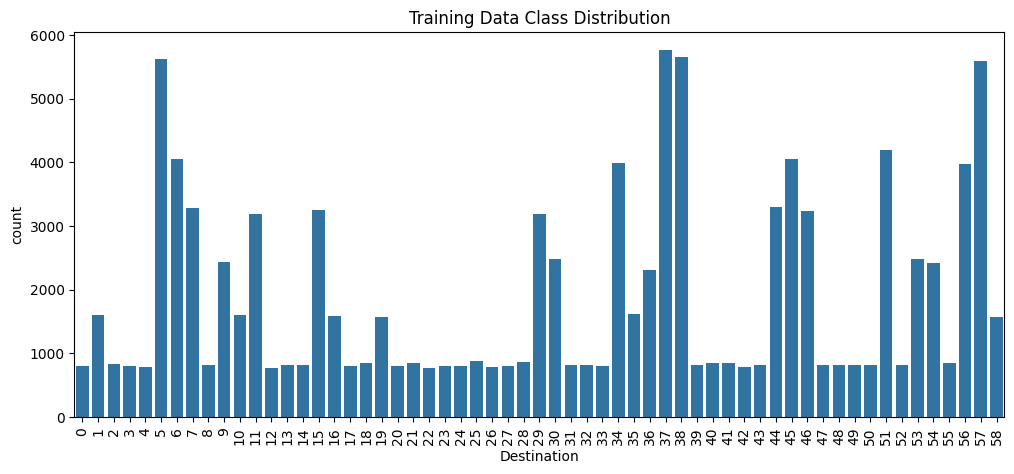

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
sns.countplot(x=y_train)
plt.xticks(rotation=90)
plt.title("Training Data Class Distribution")
plt.show()

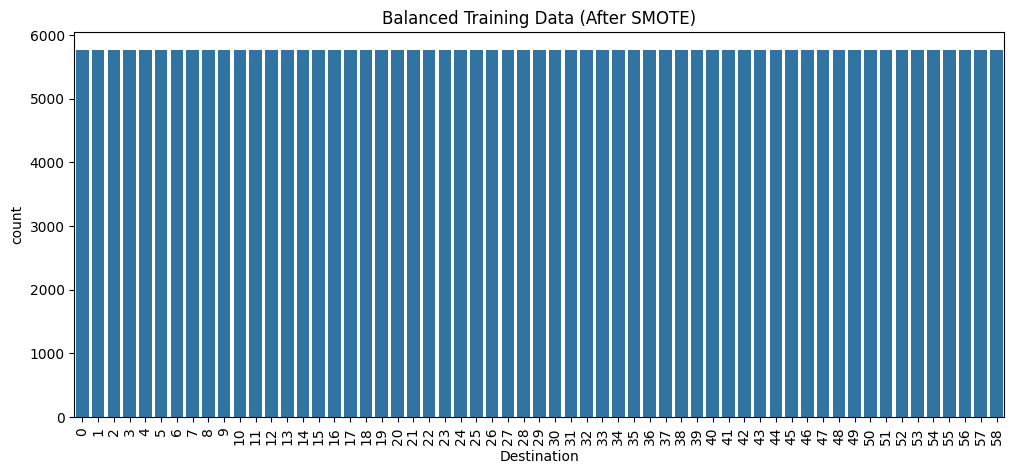

In [23]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE only to the training set
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verify new class distribution
plt.figure(figsize=(12, 5))
sns.countplot(x=y_train_resampled)
plt.xticks(rotation=90)
plt.title("Balanced Training Data (After SMOTE)")
plt.show()

In [24]:
# Reinitialize and train the Random Forest model with the resampled dataset
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

print("Model re-trained with balanced data!")

Model re-trained with balanced data!


In [25]:
# Make predictions on the original test set
y_pred_smote = rf_model.predict(X_test)

# Calculate accuracy
accuracy_smote = accuracy_score(y_test, y_pred_smote)
print(f"Model Accuracy After SMOTE: {accuracy_smote:.4f}")

# Display classification report
print("\nUpdated Classification Report After SMOTE:")
print(classification_report(y_test, y_pred_smote))

Model Accuracy After SMOTE: 0.9081

Updated Classification Report After SMOTE:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       201
           1       0.13      0.14      0.14       400
           2       1.00      1.00      1.00       206
           3       1.00      1.00      1.00       201
           4       1.00      1.00      1.00       196
           5       1.00      1.00      1.00      1406
           6       0.81      0.82      0.82      1013
           7       1.00      1.00      1.00       822
           8       1.00      1.00      1.00       202
           9       1.00      1.00      1.00       608
          10       0.54      0.52      0.53       400
          11       1.00      1.00      1.00       797
          12       1.00      1.00      1.00       193
          13       1.00      1.00      1.00       203
          14       1.00      1.00      1.00       202
          15       0.79      0.77      0.78       815
  

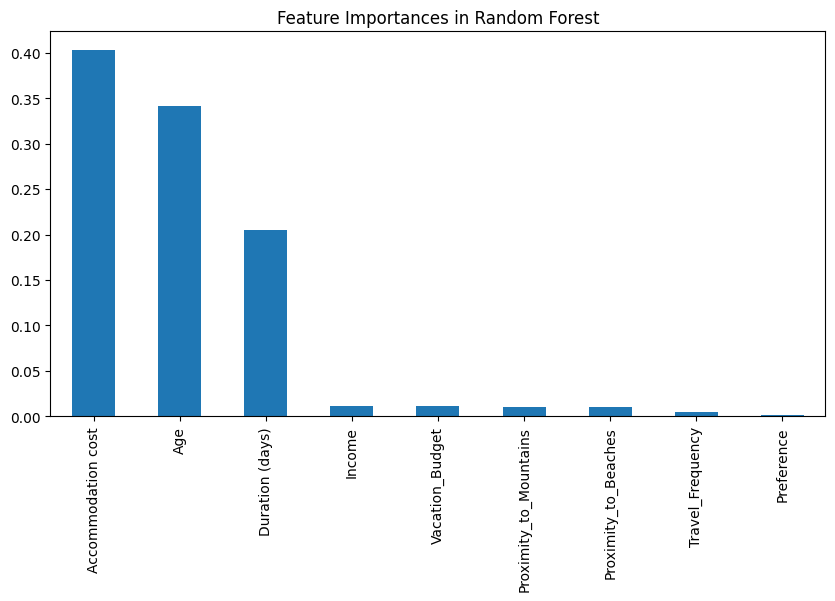

In [26]:
# Check feature importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feature_importances.sort_values(ascending=False).plot(kind="bar", figsize=(10,5))
plt.title("Feature Importances in Random Forest")
plt.show()

In [27]:
# Keep only the most important features
X_train_filtered = X_train_resampled[["Accommodation cost", "Age", "Duration (days)"]]
X_test_filtered = X_test[["Accommodation cost", "Age", "Duration (days)"]]

# Train a new Random Forest model with a reduced feature set
rf_model_filtered = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)
rf_model_filtered.fit(X_train_filtered, y_train_resampled)

# Evaluate the model
y_pred_filtered = rf_model_filtered.predict(X_test_filtered)

print(f"Filtered Model Accuracy: {accuracy_score(y_test, y_pred_filtered):.4f}")
print("\nFiltered Model Classification Report:")
print(classification_report(y_test, y_pred_filtered))

Filtered Model Accuracy: 0.9500

Filtered Model Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       201
           1       0.53      0.50      0.51       400
           2       1.00      1.00      1.00       206
           3       1.00      1.00      1.00       201
           4       1.00      1.00      1.00       196
           5       1.00      1.00      1.00      1406
           6       1.00      0.81      0.90      1013
           7       1.00      1.00      1.00       822
           8       1.00      1.00      1.00       202
           9       1.00      1.00      1.00       608
          10       0.67      1.00      0.80       400
          11       1.00      1.00      1.00       797
          12       1.00      1.00      1.00       193
          13       1.00      1.00      1.00       203
          14       1.00      1.00      1.00       202
          15       1.00      0.77      0.87       815
          

In [28]:
import numpy as np

# Generate 5 random samples from X_test
random_samples = X_test_filtered.sample(5, random_state=42)

# Make predictions for these random samples
predicted_destinations = rf_model_filtered.predict(random_samples)

# Convert numeric predictions back to actual city names
decoded_predictions = [list(destination_mapping.keys())[list(destination_mapping.values()).index(i)] for i in predicted_destinations]

# Show the results
for i, (input_data, prediction) in enumerate(zip(random_samples.values, decoded_predictions)):
    print(f"Sample {i+1}: Input Data = {input_data}")
    print(f"Predicted Destination: {prediction}\n")

Sample 1: Input Data = [300.0 26.0 9.0]
Predicted Destination: Sydney

Sample 2: Input Data = [500.0 29.0 6.0]
Predicted Destination: Bangkok, Thailand

Sample 3: Input Data = [400.0 26.0 7.0]
Predicted Destination: Bangkok

Sample 4: Input Data = [900.0 32.0 7.0]
Predicted Destination: Edinburgh, Scotland

Sample 5: Input Data = [500.0 42.0 10.0]
Predicted Destination: Mexico



In [ ]:
import joblib

# Save the trained model
joblib.dump(rf_model_filtered, "destination_model.pkl")

# Save the Label Encoder (so Flask can decode predictions)
joblib.dump(label_encoder, "label_encoder.pkl")

print("Model and encoder saved!")

Model and encoder saved!


In [ ]:
# Check the minimum and maximum values for each feature
print("Accommodation Cost Range:", X_train_resampled["Accommodation cost"].min(), "-", X_train_resampled["Accommodation cost"].max())
print("Age Range:", X_train_resampled["Age"].min(), "-", X_train_resampled["Age"].max())
print("Duration Range:", X_train_resampled["Duration (days)"].min(), "-", X_train_resampled["Duration (days)"].max())

Accommodation Cost Range: 100.0 - 8000.0
Age Range: 20.0 - 60.0
Duration Range: 5.0 - 14.0
